# SVM Lab

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [81]:
# Step 1: Load the dataset (replace with the path to your dataset)
# The dataset should have two columns: 'label' (spam/ham) and 'message' (text)
url = "../data/spam.csv"
data = pd.read_csv(url, sep=',', header=None, names=['label', 'message','x1','x2','x3'])
data = data.drop(['x1','x2','x3'], axis=1)

In [82]:
# Encode labels using OrdinalEncoder
encoder = OrdinalEncoder()
data['label'] = encoder.fit_transform(data[['label']])

In [83]:
# Print the mapping from labels to numerical values
label_mapping = {category: idx for idx, category in enumerate(encoder.categories_[0])}
print("Label Encoding:")
for label, value in label_mapping.items():
    print(f"'{label}' -> {value}")

Label Encoding:
'ham' -> 0
'spam' -> 1


In [84]:
df

,label,message
0,0.00,"Go until jurong point, crazy.. Available only ..."
1,0.00,Ok lar... Joking wif u oni...
2,1.00,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.00,U dun say so early hor... U c already then say...
4,0.00,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1.00,This is the 2nd time we have tried 2 contact u...
5568,0.00,Will �_ b going to esplanade fr home?
5569,0.00,"Pity, * was in mood for that. So...any other s..."
5570,0.00,The guy did some bitching but I acted like i'd...


In [85]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=42)

# Step 3: Text encoding using TF-IDF
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [86]:
# Step 4: Train the SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X_train_tfidf, y_train)

# Step 5: Make predictions and evaluate
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9778708133971292

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1453
         1.0       0.96      0.87      0.91       219

    accuracy                           0.98      1672
   macro avg       0.97      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [45]:
import numpy as np

In [46]:
# Decode predictions (optional)
decoded_labels = encoder.inverse_transform(y_pred.reshape(-1, 1))
print("Decoded Predictions (First 10):", decoded_labels[:10].flatten())
decoded_labels = encoder.inverse_transform(np.array(y_test).reshape(-1, 1))
print("Decoded Predictions (First 10):", decoded_labels[:10].flatten())

Decoded Predictions (First 10): ['ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham']
Decoded Predictions (First 10): ['ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham']


In [47]:
# Find misclassified examples
y_pred = np.array(y_pred)
y_test = np.array(y_test)
misclassified_indices = (y_pred != y_test).nonzero()[0]  # Indices where predictions differ from true labels

# Print the first few misclassified examples
print("\nMisclassified Examples:")
for idx in misclassified_indices[10:20]:  # Limit to 5 examples
    print(f"Message: {X_test.iloc[idx]}")
    print(f"True Label: {encoder.inverse_transform([[y_test[idx]]])[0][0]}")
    print(f"Predicted Label: {encoder.inverse_transform([[y_pred[idx]]])[0][0]}")
    print("-" * 50)



Misclassified Examples:
Message: Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
True Label: spam
Predicted Label: ham
--------------------------------------------------
Message: Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?
True Label: spam
Predicted Label: ham
--------------------------------------------------
Message: LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
True Label: spam
Predicted Label: ham
--------------------------------------------------
Message: Please call Amanda with regard to renewing or upgrading your current T-Mobile handset free of charge. Offer ends today. Tel 0845 021 3680 subject to T's and C's
True Label: spam
Predicted Label: ham
--------------------------------------------------
Message: As a registered optin s

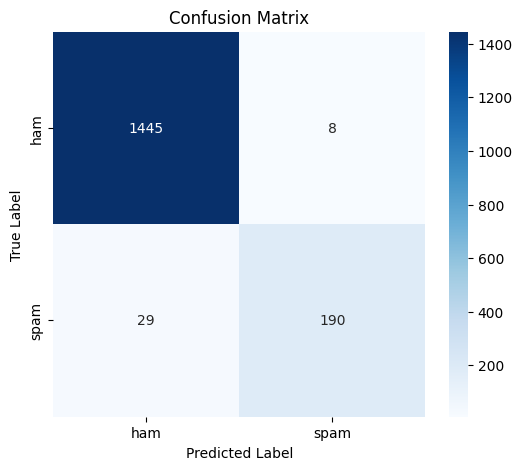

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])

# Adding labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()


In [13]:
X_train_tfidf[0][0]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [14]:
X_train

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: message, Length: 3900, dtype: object

In [15]:
y_train

708     1.0
4338    0.0
5029    0.0
4921    0.0
2592    0.0
       ... 
3772    0.0
5191    0.0
5226    0.0
5390    0.0
860     0.0
Name: label, Length: 3900, dtype: float64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate

# Sample documents
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Example documents (larger and more varied)
documents = [
    "I love this product! It's exactly what I was looking for. Highly recommend it to anyone.",
    "The phone is great, but the battery life is a bit disappointing. It could be better.",
    "Worst purchase ever! The screen cracked after a single drop. I will never buy from this brand again.",
    "The service was excellent, and the food was amazing. Would definitely come back.",
    "This is a fantastic book. The plot twists kept me on the edge of my seat. A must-read!",
    "I received my order late, and it was missing an item. Very poor customer service.",
    "Not as expected. The quality was cheap, and it broke within a few days of use.",
    "Amazing experience! The staff was friendly, and the ambiance was perfect. Highly recommend this restaurant.",
    "The movie was okay, but the pacing was slow. It could have been a lot better.",
    "The product works well for the price. It’s not the best quality, but it gets the job done."
]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features = 10)

# Fit and transform the documents into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to a dense format and display
dense_matrix = tfidf_matrix.todense()

# Print the feature names and their corresponding TF-IDF values for each document
df = pd.DataFrame(dense_matrix, columns=feature_names)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
df

,amazing,battery,better,broke,buy,highly,product,quality,recommend,service
0,0.00,0.00,0.00,0.00,0.00,0.58,0.58,0.00,0.58,0.00
1,0.00,0.76,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
6,0.00,0.00,0.00,0.76,0.00,0.00,0.00,0.65,0.00,0.00
7,0.58,0.00,0.00,0.00,0.00,0.58,0.00,0.00,0.58,0.00
8,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.71,0.00,0.00


## Count Vectorizer

Accuracy: 97.97%


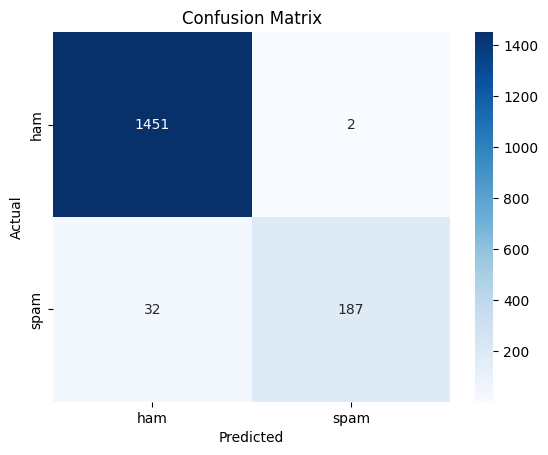


Label Encoding:
ham = 0.0
spam = 1.0


/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

url = "../data/spam.csv"
data = pd.read_csv(url, sep=',', header=None, names=['label', 'message','x1','x2','x3'])
data = data.drop(['x1','x2','x3'], axis=1)
# Create DataFrame
df = pd.DataFrame(data)

# Encode labels using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['label'] = encoder.fit_transform(df[['label']])

# Split data into features and target
X = df['message']
y = df['label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use CountVectorizer for text encoding
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_vec)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print encoding of labels
print("\nLabel Encoding:")
for label, encoded in zip(encoder.categories_[0], encoder.transform([[label] for label in encoder.categories_[0]])):
    print(f"{label} = {encoded[0]}")


## Word Embeddings

In [23]:
import gensim.downloader as api
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load pre-trained Word2Vec model (Google's Word2Vec)
word2vec = api.load("word2vec-google-news-300")  # 300-dimensional vectors
url = "../data/spam.csv"
data = pd.read_csv(url, sep=',', header=None, names=['label', 'message','x1','x2','x3'])
data = data.drop(['x1','x2','x3'], axis=1)
# Create DataFrame
df = pd.DataFrame(data)

Accuracy: 96.53%


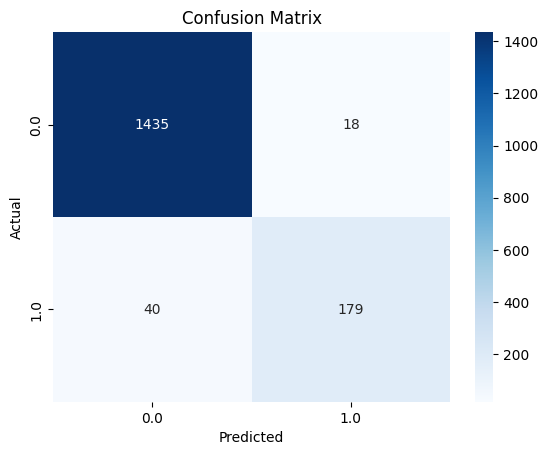


Label Encoding:
0.0 = 0.0
1.0 = 1.0


/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [38]:
# Encode labels using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['label'] = encoder.fit_transform(df[['label']])

# Split data into features and target
X = df['message']
y = df['label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to average Word2Vec embeddings for each document
def average_word2vec(doc):
    word_vectors = [word2vec[word] for word in doc.split() if word in word2vec]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(word2vec.vector_size)  # Return a vector of zeros if no words are found

# Transform the text data into Word2Vec embeddings
X_train_vec = np.array([average_word2vec(text) for text in X_train])
X_test_vec = np.array([average_word2vec(text) for text in X_test])

# Train an SVM classifier
svm_classifier = SVC(kernel='poly', degree=2)
svm_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_vec)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print encoding of labels
print("\nLabel Encoding:")
for label, encoded in zip(encoder.categories_[0], encoder.transform([[label] for label in encoder.categories_[0]])):
    print(f"{label} = {encoded[0]}")